In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
key="'80c1cc50c2494ba4daf6bbd4dd8bc441611220f8'"

In [5]:
df = pdr.get_data_tiingo('SBUX', api_key='80c1cc50c2494ba4daf6bbd4dd8bc441611220f8')

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv('SBUX.csv')

In [7]:
df.head() 

close   high    low   open    volume  \
symbol date                                                              
SBUX   2018-04-19 00:00:00+00:00  59.22  59.49  58.73  59.42   6280126   
       2018-04-20 00:00:00+00:00  58.00  59.18  57.80  59.03  12037567   
       2018-04-23 00:00:00+00:00  58.16  58.73  57.69  58.01   8444396   
       2018-04-24 00:00:00+00:00  57.81  58.66  57.65  58.48   7793565   
       2018-04-25 00:00:00+00:00  57.71  58.27  57.29  58.27   8367357   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
SBUX   2018-04-19 00:00:00+00:00  53.513605  53.757588  53.070821  53.694333   
       2018-04-20 00:00:00+00:00  52.411163  53.477459  52.230435  53.341913   
       2018-04-23 00:00:00+00:00  52.555746  53.070821  52.131035  52.420200   
       2018-04-24 00:00:00+00:00  52.239471  53.007566  52.094889  52.844911   
       2018-04-25 00:00:00+00:00  52.149107  52.655146  51.769578  52.655146   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
SBUX   2018-04-19 00:00:00+00:00    6280126      0.0          1.0  
       2018-04-20 00:00:00+00:00   12037567      0.0          1.0  
       2018-04-23 00:00:00+00:00    8444396      0.0          1.0  
       2018-04-24 00:00:00+00:00    7793565      0.0          1.0  
       2018-04-25 00:00:00+00:00    8367357      0.0          1.0

In [8]:
df.tail()

close     high     low     open   volume  \
symbol date                                                                   
SBUX   2023-04-10 00:00:00+00:00  104.74  104.820  103.07  103.545  3761576   
       2023-04-11 00:00:00+00:00  105.74  106.400  104.92  105.060  4010604   
       2023-04-12 00:00:00+00:00  105.60  106.580  105.35  106.240  4606206   
       2023-04-13 00:00:00+00:00  106.99  107.225  106.25  106.380  4367557   
       2023-04-14 00:00:00+00:00  107.47  108.170  106.85  106.910  3963272   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
SBUX   2023-04-10 00:00:00+00:00    104.74  104.820  103.07  103.545   
       2023-04-11 00:00:00+00:00    105.74  106.400  104.92  105.060   
       2023-04-12 00:00:00+00:00    105.60  106.580  105.35  106.240   
       2023-04-13 00:00:00+00:00    106.99  107.225  106.25  106.380   
       2023-04-14 00:00:00+00:00    107.47  108.170  106.85  106.910   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
SBUX   2023-04-10 00:00:00+00:00    3761576      0.0          1.0  
       2023-04-11 00:00:00+00:00    4010604      0.0          1.0  
       2023-04-12 00:00:00+00:00    4606206      0.0          1.0  
       2023-04-13 00:00:00+00:00    4367557      0.0          1.0  
       2023-04-14 00:00:00+00:00    3963272      0.0          1.0

In [9]:
df1=df.reset_index()['close']
df1

0        59.22
1        58.00
2        58.16
3        57.81
4        57.71
         ...  
1251    104.74
1252    105.74
1253    105.60
1254    106.99
1255    107.47
Name: close, Length: 1256, dtype: float64

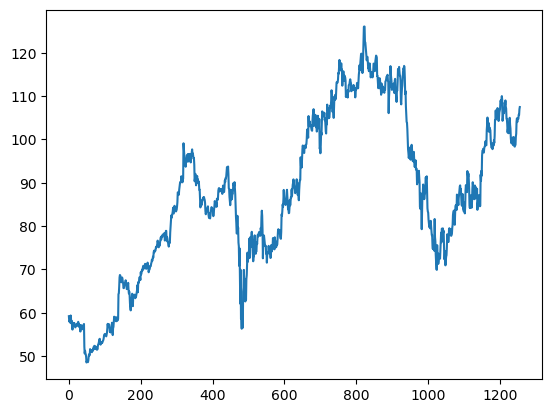

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
print(df1)

0        59.22
1        58.00
2        58.16
3        57.81
4        57.71
         ...  
1251    104.74
1252    105.74
1253    105.60
1254    106.99
1255    107.47
Name: close, Length: 1256, dtype: float64


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.1377709 ],
       [0.12203302],
       [0.12409701],
       ...,
       [0.73606811],
       [0.75399897],
       [0.76019092]])

In [14]:
##Spliting into train and test
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [15]:
training_size,test_size

(879, 377)

In [16]:
train_data


array([[1.37770898e-01],
       [1.22033024e-01],
       [1.24097007e-01],
       [1.19582043e-01],
       [1.18292054e-01],
       [1.39834881e-01],
       [1.26676987e-01],
       [1.16486068e-01],
       [1.23710010e-01],
       [1.05263158e-01],
       [9.79102167e-02],
       [1.17905057e-01],
       [1.14938080e-01],
       [1.17776058e-01],
       [1.09649123e-01],
       [1.17518060e-01],
       [1.12616099e-01],
       [1.10810114e-01],
       [1.04489164e-01],
       [1.11068111e-01],
       [1.11713106e-01],
       [1.11197110e-01],
       [1.13519092e-01],
       [1.08617131e-01],
       [1.15454076e-01],
       [1.17905057e-01],
       [1.21001032e-01],
       [1.12100103e-01],
       [1.15325077e-01],
       [1.04876161e-01],
       [1.07972136e-01],
       [1.10036120e-01],
       [9.21052632e-02],
       [1.11326109e-01],
       [1.10939112e-01],
       [1.03973168e-01],
       [1.02425181e-01],
       [1.02425181e-01],
       [9.89422085e-02],
       [1.09391125e-01],


In [17]:
# converted array  values in a dataset matrix
import  numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a =  dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(778, 100)
(778,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(276, 100)
(276,)


(None, None)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1) 

Epoch 1/100
13/13 [==============================] - 7s 260ms/step - loss: 0.1297 - val_loss: 0.0069
Epoch 2/100
13/13 [==============================] - 2s 193ms/step - loss: 0.0152 - val_loss: 0.0122
Epoch 3/100
13/13 [==============================] - 2s 190ms/step - loss: 0.0089 - val_loss: 0.0049
Epoch 4/100
13/13 [==============================] - 3s 197ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 5/100
13/13 [==============================] - 3s 197ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 6/100
13/13 [==============================] - 3s 204ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 7/100
13/13 [==============================] - 4s 302ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 8/100
13/13 [==============================] - 5s 369ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 9/100
13/13 [==============================] - 4s 322ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 10/100
13/13 [==============================] - 4s 328ms/step - loss: 0.0025 - val_lo

In [27]:
import tensorflow as tf

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 32ms/step


In [29]:
##Transeform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict) 


In [30]:
##Calculate RMSE
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

89.62942214414755

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

91.21196480921739

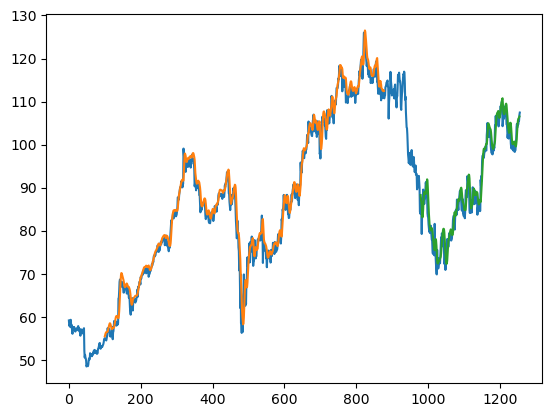

In [32]:
##train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
##shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
##plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

377

In [44]:
x_input=test_data[277:].reshape(1,-1)
x_input.shape

(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.6373839009287925,
 0.6421568627450978,
 0.6435758513931888,
 0.6576367389060886,
 0.6581527347781218,
 0.6465428276573786,
 0.6465428276573786,
 0.6922084623323013,
 0.7073013415892673,
 0.7289731682146541,
 0.7096233230134157,
 0.6906604747162022,
 0.6879514963880289,
 0.7120743034055725,
 0.6869195046439627,
 0.6986584107327141,
 0.6910474716202268,
 0.6920794633642928,
 0.6636996904024766,
 0.648735810113519,
 0.6418988648090813,
 0.6380288957688336,
 0.6466718266253868,
 0.6349329205366356,
 0.6415118679050567,
 0.6535087719298245,
 0.645768833849329,
 0.660861713106295,
 0.6535087719298245,
 0.6745356037151702,
 0.7213622291021669,
 0.7209752321981424,
 0.750128998968008,
 0.7249742002063981,
 0.7412280701754383,
 0.7450980392156861,
 0.7392930856553146,
 0.7570949432404539,
 0.7509029927760575,
 0.7283281733746128,
 0.718782249742002,
 0.7288441692466459,
 0.7439370485036116,
 0.7494840041279669,
 0.7538699690402475,
 0.7768317853457172,
 0.7801857585139316,
 0.772187822497419

In [46]:
##prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7626817]
101
1 day input [0.64215686 0.64357585 0.65763674 0.65815273 0.64654283 0.64654283
 0.69220846 0.70730134 0.72897317 0.70962332 0.69066047 0.6879515
 0.7120743  0.6869195  0.69865841 0.69104747 0.69207946 0.66369969
 0.64873581 0.64189886 0.6380289  0.64667183 0.63493292 0.64151187
 0.65350877 0.64576883 0.66086171 0.65350877 0.6745356  0.72136223
 0.72097523 0.750129   0.7249742  0.74122807 0.74509804 0.73929309
 0.75709494 0.75090299 0.72832817 0.71878225 0.72884417 0.74393705
 0.749484   0.75386997 0.77683179 0.78018576 0.77218782 0.78173375
 0.79269866 0.78186275 0.71929825 0.72858617 0.75187049 0.74509804
 0.74187307 0.75528896 0.77373581 0.76676987 0.77992776 0.76109391
 0.75541796 0.7254902  0.7253612  0.70910733 0.68446852 0.69530444
 0.69078947 0.68227554 0.70265738 0.72252322 0.72819917 0.70691434
 0.69607843 0.66769866 0.65583075 0.65196078 0.65686275 0.65531476
 0.66937564 0.64705882 0.6618937  0.67079463 0.65247678 0.64344685
 0.64241486 0.64654283 0.64731682 0

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
len(df1)

1256

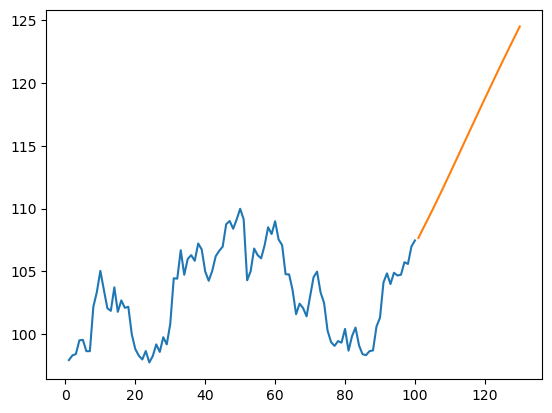

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))